In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
def z_score(df: pd.DataFrame, col: str):
    return (df[col] - df[col].mean()) / df[col].std()

In [53]:
df = pd.read_csv('Online_Retail.csv', encoding='latin1')

In [54]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [55]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/11 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


In [38]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [71]:
df.groupby('CustomerID').aggregate({'InvoiceNo': 'nunique', 'Quantity': 'sum'})

,InvoiceNo,Quantity
CustomerID,,
12346.0,2,0
12347.0,7,2458
12348.0,4,2341
12349.0,1,631
12350.0,1,197
...,...,...
18280.0,1,45
18281.0,1,54
18282.0,3,98


In [39]:
_col = df['Country']
df.drop(columns=['StockCode', 'InvoiceNo', 'InvoiceDate', 'CustomerID', 'Country'], axis=1, inplace=True)
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.insert(loc=1, column='Country', value=_col)
df['Description'].fillna(df['Description'].mode()[0], inplace=True)

In [40]:
df.head()

,Description,Country,Quantity,UnitPrice,TotalPrice
0,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom,6,2.55,15.30
1,WHITE METAL LANTERN,United Kingdom,6,3.39,20.34
2,CREAM CUPID HEARTS COAT HANGER,United Kingdom,8,2.75,22.00
3,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom,6,3.39,20.34
4,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom,6,3.39,20.34


In [41]:
df.describe(include='all')

,Description,Country,Quantity,UnitPrice,TotalPrice
count,541909,541909,541909.000000,541909.000000,541909.000000
unique,4223,38,NaN,NaN,NaN
top,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom,NaN,NaN,NaN
freq,3823,495478,NaN,NaN,NaN
mean,NaN,NaN,9.552250,4.611114,17.987795
std,NaN,NaN,218.081158,96.759853,378.810824
min,NaN,NaN,-80995.000000,-11062.060000,-168469.600000
25%,NaN,NaN,1.000000,1.250000,3.400000
50%,NaN,NaN,3.000000,2.080000,9.750000
75%,NaN,NaN,10.000000,4.130000,17.400000


In [42]:
df.isnull().sum()

Description    0
Country        0
Quantity       0
UnitPrice      0
TotalPrice     0
dtype: int64

In [43]:
df.value_counts()

Description                         Country         Quantity  UnitPrice  TotalPrice
ASSORTED COLOUR BIRD ORNAMENT       United Kingdom   8        1.69       13.52         546
LUNCH BAG RED RETROSPOT             United Kingdom   10       1.65       16.50         526
REX CASH+CARRY JUMBO SHOPPER        United Kingdom   1        0.95       0.95          514
WHITE HANGING HEART T-LIGHT HOLDER  United Kingdom   6        2.95       17.70         508
JUMBO BAG RED RETROSPOT             United Kingdom   10       2.08       20.80         481
                                                                                      ... 
JUMBO BAG TOYS                      United Kingdom   9        1.95       17.55           1
                                                              2.08       18.72           1
                                                              4.13       37.17           1
                                                     10       4.13       41.30           1
wrongl

In [44]:
# Calculate the Z-scores
df['Quantity Z-Score'] = z_score(df, 'Quantity')
df['UnitPrice Z-Score'] = z_score(df, 'UnitPrice')

# Define a threshold for identifying outliers
threshold = 4

# Extract outliers
df = df[np.abs((df['Quantity Z-Score']) <= threshold) & np.abs((df['UnitPrice Z-Score']) <= threshold) & (df['Quantity'] >= 0) & (df['UnitPrice'] >= 0)].copy()
df.drop(columns=['Quantity Z-Score', 'UnitPrice Z-Score'], axis=1, inplace=True)

In [45]:
df.value_counts()

Description                         Country         Quantity  UnitPrice  TotalPrice
ASSORTED COLOUR BIRD ORNAMENT       United Kingdom  8         1.69       13.52         546
LUNCH BAG RED RETROSPOT             United Kingdom  10        1.65       16.50         526
REX CASH+CARRY JUMBO SHOPPER        United Kingdom  1         0.95       0.95          514
WHITE HANGING HEART T-LIGHT HOLDER  United Kingdom  6         2.95       17.70         508
JUMBO BAG RED RETROSPOT             United Kingdom  10        2.08       20.80         481
                                                                                      ... 
JUMBO STORAGE BAG SKULLS            United Kingdom  8         4.13       33.04           1
                                                              4.21       33.68           1
                                                    9         4.96       44.64           1
                                                    10        4.13       41.30           1
wrongl

In [46]:
df.describe()

,Quantity,UnitPrice,TotalPrice
count,530949.000000,530949.000000,530949.000000
mean,9.907626,3.503271,18.781569
std,27.412748,7.660698,56.556040
min,1.000000,0.000000,0.000000
25%,1.000000,1.250000,3.750000
50%,3.000000,2.080000,9.900000
75%,10.000000,4.130000,17.700000
max,864.000000,391.320000,4781.600000


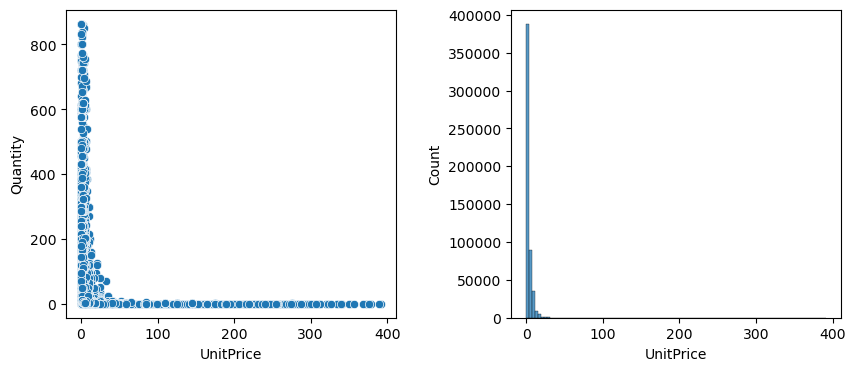

In [47]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
sns.scatterplot(data=df, x='UnitPrice', y='Quantity', ax=ax1)
sns.histplot(data=df, x='UnitPrice', bins=100, ax=ax2)
fig.subplots_adjust(wspace=0.35)
plt.show()

In [49]:
# Going to do country for now since there is less one-hot encoding
df.drop(columns=['Description', 'Country'], axis=1, inplace=True)

In [29]:
# df = pd.get_dummies(df, columns=['Country'])

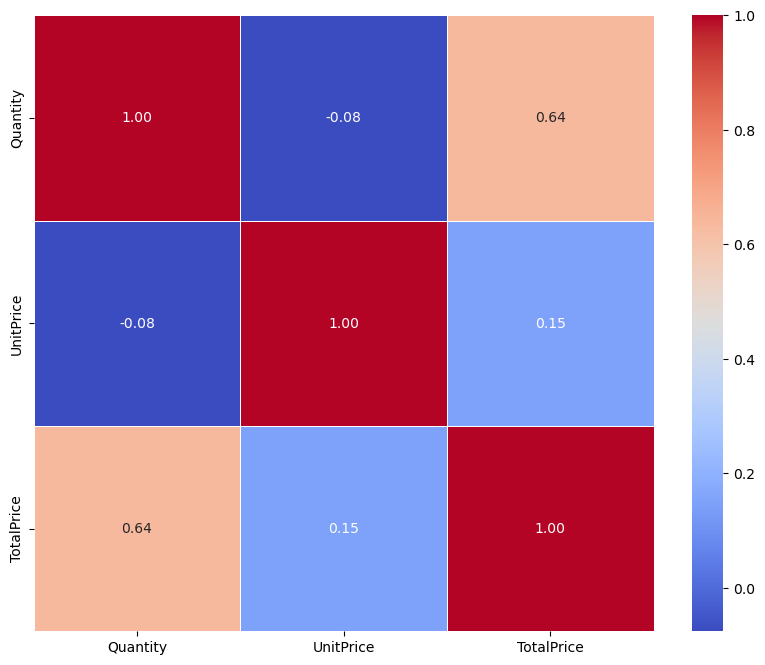

In [50]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the correlation matrix
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Show the plot
plt.show()